In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
winedf = pd.read_csv('winemag-data_first150k.csv')
winedf.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
winedf1 = winedf.loc[lambda winedf:winedf['points'] < 84,:]
winedf2 = winedf.loc[lambda winedf:winedf['points'] >= 94,:]

In [5]:
winedf1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1850,1850,Argentina,Rudimentary aromas of lemon-lime and apple set...,Casa Bianchi Brut Traditional Method,83,NaN,Mendoza Province,Mendoza,NaN,Champagne Blend,Valentin Bianchi
1851,1851,Argentina,"Flat and fruitless up front, this smells a bit...",NaN,83,15.0,Mendoza Province,Mendoza,NaN,Sauvignon Blanc,Viejo Isaias
1852,1852,US,"Sour fruit, funky root beer, dried salami and ...",Kick Ass,83,25.0,California,Carmel Valley,Central Coast,Red Blend,Galante
1853,1853,US,"This soft, robustly ripe wine shows a raisin-l...",Fog,83,34.0,California,Russian River Valley,Sonoma,Zinfandel,Mazzocco
1854,1854,US,"This is a thin, unfussy wine that imparts bell...",NaN,83,65.0,California,Napa Valley,Napa,Cabernet Sauvignon,Jeff Gordon


In [6]:
winedf[winedf['description'].duplicated(keep = False)].sort_values('description').head(8)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
147725,147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
62345,62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
74993,74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
18803,18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
26530,26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister
84730,84730,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister
53110,53110,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister
107351,107351,France,. From a small south-facing parcel next to the...,Trie Spéciale,91,38.0,Loire Valley,Savennières,NaN,Chenin Blanc,Domaine des Baumard


In [7]:
winedf2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


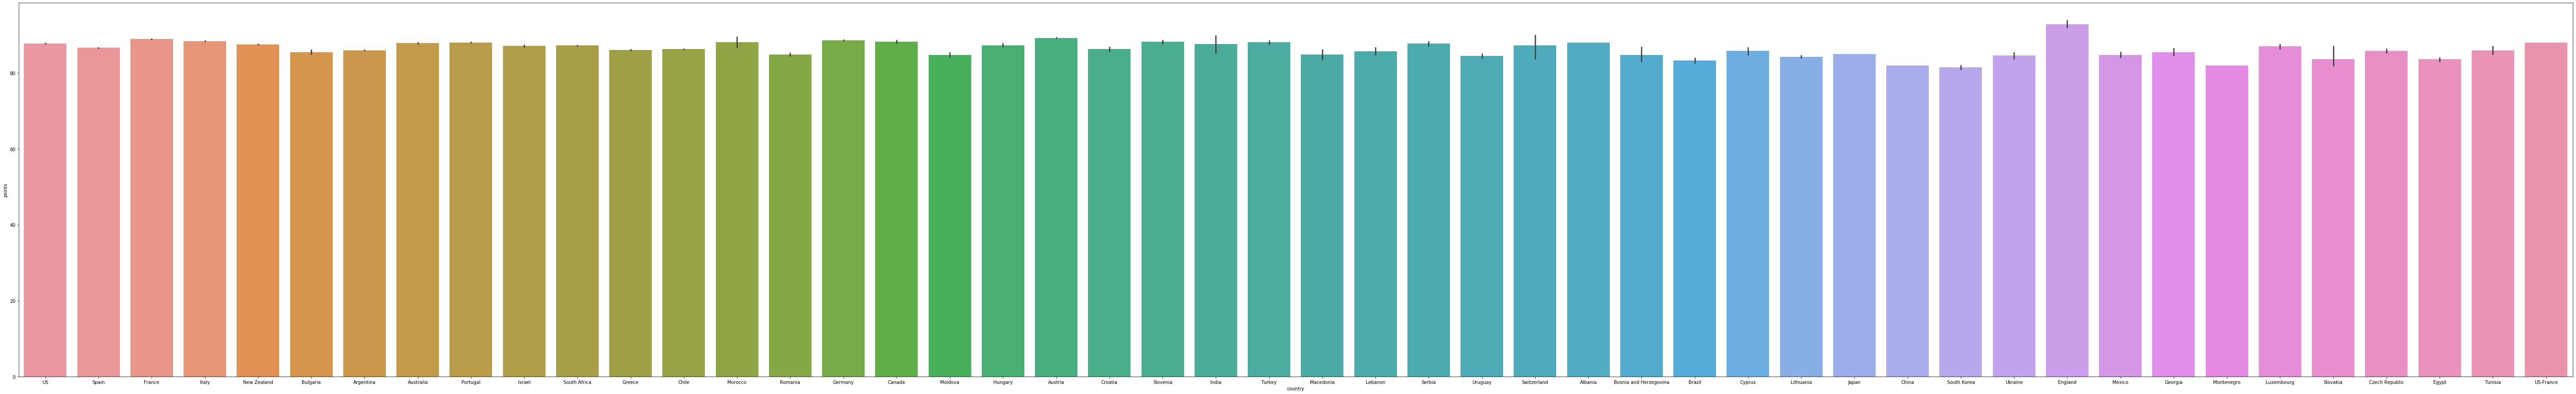

In [8]:
fig = plt.figure(figsize = (100,15))
a=sns.barplot(x = 'country', y = 'points', data = winedf)
a= winedf.sort_values('points')

In [9]:
import texthero as hero

In [10]:
winedf1 = winedf1.drop_duplicates('description')
winedf2 = winedf2.drop_duplicates('description')

In [ ]:
# variety_df['variety'].unique()

In [14]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)


In [20]:
winedf1['clean_description'] = hero.clean(winedf1['description'])
winedf2['clean_description'] = hero.clean(winedf2['description'])

In [21]:
#create custom pipeline
custom_pipeline = [hero.preprocessing.fillna,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_whitespace,
                   hero.preprocessing.remove_urls
                   ]

In [22]:
winedf1['clean_description'] = winedf1['description'].pipe(hero.clean, custom_pipeline)
winedf2['clean_description'] = winedf2['description'].pipe(hero.clean, custom_pipeline)

In [23]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [24]:
winedf1['clean_description'] = winedf1['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
winedf1['clean_description'] = winedf1['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext = [remove_stopwords(r.split()) for r in winedf1['clean_description']]


# make entire text lowercase
reviewstext = [r.lower() for r in reviewstext]


In [25]:
winedf2['clean_description'] = winedf2['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
winedf2['clean_description'] = winedf2['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext2 = [remove_stopwords(r.split()) for r in winedf2['clean_description']]

# make entire text lowercase
reviewstext2 = [r.lower() for r in reviewstext2]


In [26]:
import nltk
from nltk import FreqDist
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(8,3))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

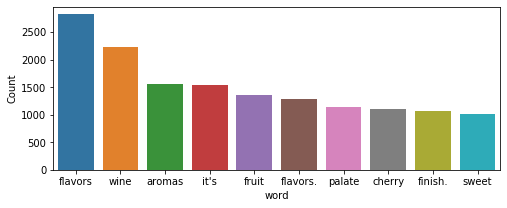

In [27]:
freq_words(reviewstext, 10)

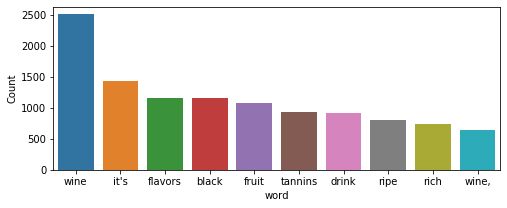

In [28]:
freq_words(reviewstext2, 10)

In [29]:
winedf1['clean_description'] = winedf1['clean_description'].str.replace("[^a-zA-Z#]", " ")
winedf2['clean_description'] = winedf2['clean_description'].str.replace("[^a-zA-Z#]", " ")

/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [31]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [33]:
winedf1['clean_description'] = winedf1['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext = [remove_stopwords(r.split()) for r in winedf1['clean_description']]


# make entire text lowercase
reviewstext = [r.lower() for r in reviewstext]


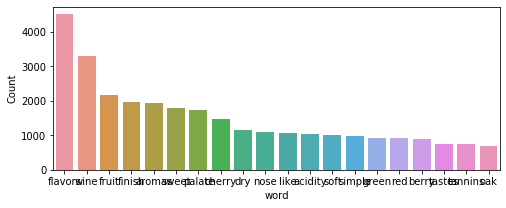

In [34]:
freq_words(reviewstext, 20)

In [35]:
reviewstext

['rudimentary aromas lemon lime apple set flat palate tastes dried apricots turning decidedly bitter finish flavors dried white fruits modest',
 'flat fruitless front smells bit like haystack plump palate sense grape skins mouthfeel tastes yeasty mildly bitter nonspecific white fruits',
 'sour fruit funky root beer dried salami asphalt aromas show nose rustic bottling dried fruit espresso flavors mark palate',
 'soft robustly ripe wine shows raisin like prune character tasting somewhat chalky palate',
 'thin unfussy wine imparts bell pepper asparagus sea green flavor',
 'high ripeness intensity vineyard designate overpowers astringency plows wall blackberry jam chocolate flavors',
 'sweet sparkling ros clean crisp attractive strawberry fruit soft texture light mousse drink',
 'unusual earthy herbal character dominates mild fruitiness marzipan character medium bodied slightly sweet wine',
 'sweet fruity canned wine feels soft syrupy sugary pear primary flavor palate basic white wine con

In [36]:
winedf2['clean_description'] = winedf2['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext2 = [remove_stopwords(r.split()) for r in winedf2['clean_description']]

# make entire text lowercase
reviewstext2 = [r.lower() for r in reviewstext2]

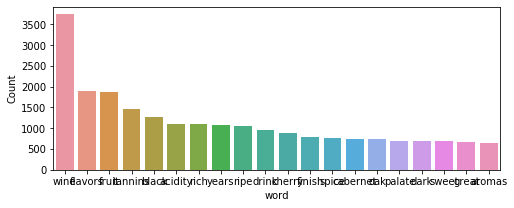

In [37]:
freq_words(reviewstext2, 20)

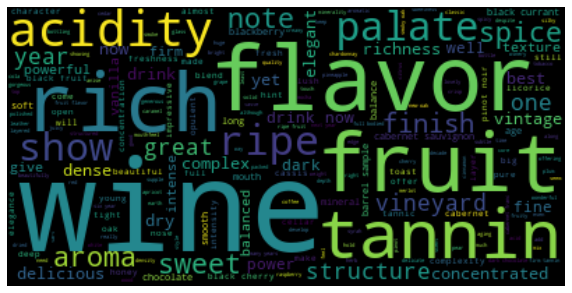

In [41]:
import PIL
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(review for review in winedf2['clean_description'])

wordcloud = WordCloud(background_color="black").generate(text)

text = " ".join(review for review in winedf2['clean_description'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

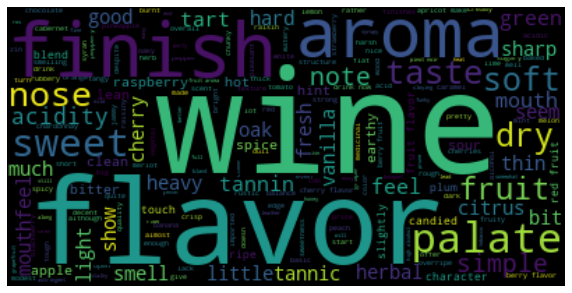

In [42]:
import PIL
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(review for review in winedf1['clean_description'])

wordcloud = WordCloud(background_color="black").generate(text)

text = " ".join(review for review in winedf1['clean_description'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()